       Country  Year      Status  Life  Adult Mortality  infant deaths  \
0  Afghanistan  2015  Developing  65.0              263             62   
1  Afghanistan  2014  Developing  59.9              271             64   
2  Afghanistan  2013  Developing  59.9              268             66   
3  Afghanistan  2012  Developing  59.5              272             69   
4  Afghanistan  2011  Developing  59.2              275             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles   ...  Polio  \
0     0.01               71.279624           65      1154  ...      6   
1     0.01               73.523582           62       492  ...     58   
2     0.01               73.219243           64       430  ...     62   
3     0.01               78.184215           67      2787  ...     67   
4     0.01                7.097109           68      3013  ...     68   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0               8.16           65        0.1

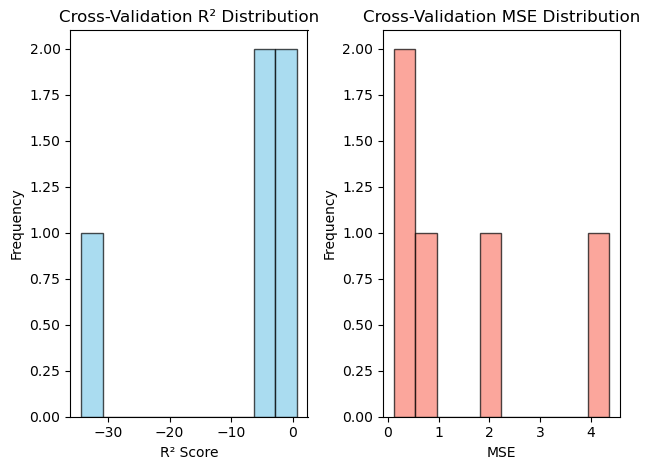

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv(r"C:\Users\ASUS\Downloads\archive\Afghanistan Life Data.csv")
print(df.head())

# 2. 데이터 전처리
df = df[['Year', 'GDP', 'Population', 'Life']]
df = df.dropna()  
X = df[['Year', 'GDP', 'Population']]
y = df['Life']    

# 3. 데이터 분할 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 5. 초기 성능 평가 
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"테스트 데이터 MSE: {mse:.4f}")
print(f"테스트 데이터 R²: {r2:.4f}")

# 6. 교차 검증 성능 평가
cv_scores_mse = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"\n교차 검증 MSE: {cv_scores_mse}")
print(f"교차 검증 평균 MSE: {cv_scores_mse.mean():.4f}")
print(f"교차 검증 R²: {cv_scores_r2}")
print(f"교차 검증 평균 R²: {cv_scores_r2.mean():.4f}")


# 1. 교차 검증 R² 점수 히스토그램
plt.subplot(1, 2, 1)
plt.hist(cv_scores_r2, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Cross-Validation R² Distribution')
plt.xlabel('R² Score')
plt.ylabel('Frequency')

# 2. 교차 검증 MSE 점수 히스토그램
plt.subplot(1, 2, 2)
plt.hist(cv_scores_mse, bins=10, color='salmon', edgecolor='black', alpha=0.7)
plt.title('Cross-Validation MSE Distribution')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

       Country  Year      Status  Life  Adult Mortality  infant deaths  \
0  Afghanistan  2015  Developing  65.0              263             62   
1  Afghanistan  2014  Developing  59.9              271             64   
2  Afghanistan  2013  Developing  59.9              268             66   
3  Afghanistan  2012  Developing  59.5              272             69   
4  Afghanistan  2011  Developing  59.2              275             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles   ...  Polio  \
0     0.01               71.279624           65      1154  ...      6   
1     0.01               73.523582           62       492  ...     58   
2     0.01               73.219243           64       430  ...     62   
3     0.01               78.184215           67      2787  ...     67   
4     0.01                7.097109           68      3013  ...     68   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0               8.16           65        0.1

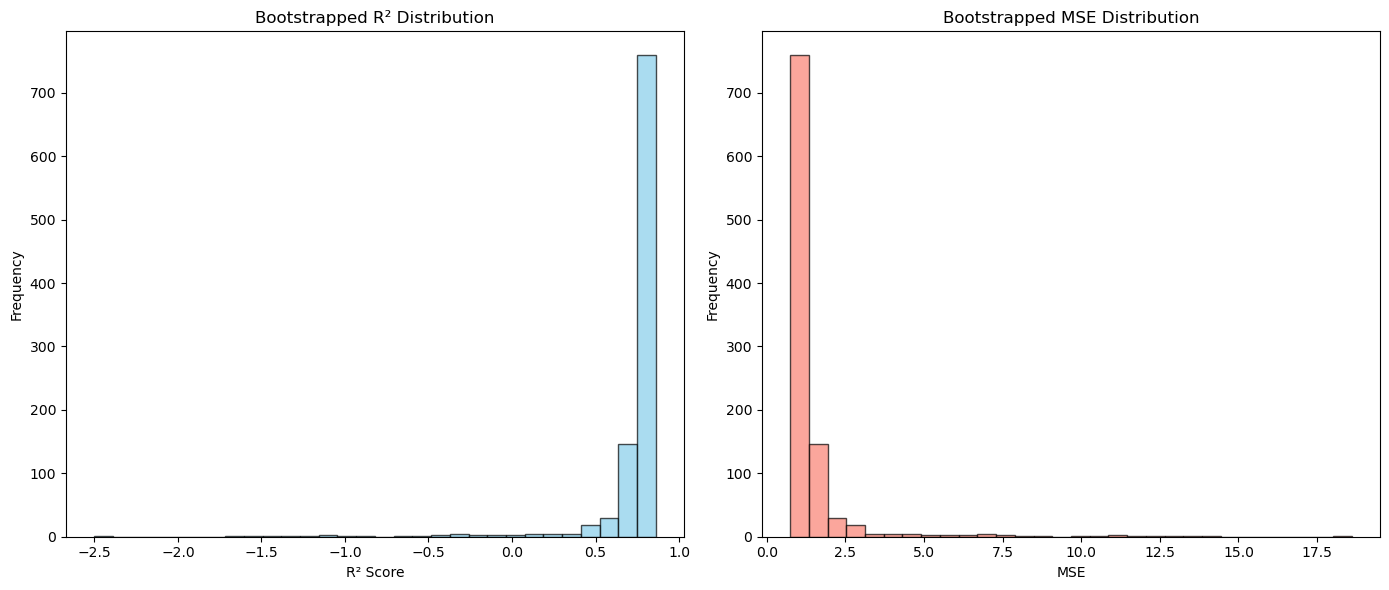

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv(r"C:\Users\ASUS\Downloads\archive\Afghanistan Life Data.csv")
print(df.head())

# 2. 데이터 전처리
df = df[['Year', 'GDP', 'Population', 'Life']]

df = df.dropna()  

X = df[['Year', 'GDP', 'Population']]
y = df['Life']                     

# 3. 데이터 분할 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 5. 초기 성능 평가 
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"테스트 데이터 MSE: {mse:.4f}")
print(f"테스트 데이터 R²: {r2:.4f}")

# 6. 부트스트래핑 파라미터 설정
n_bootstraps = 1000  # 부트스트랩 반복 횟수
bootstrap_mse = []
bootstrap_r2 = []

# 모델 학습 및 평가 반복
for _ in range(n_bootstraps):
    X_resampled, y_resampled = resample(X, y)  # 데이터 리샘플링
    model.fit(X_resampled, y_resampled)        # 모델 학습
    y_pred = model.predict(X)                  # 원본 X 데이터로 예측
    
    # MSE와 R² 점수 계산
    mse = mean_squared_error(y, y_pred)       
    r2 = r2_score(y, y_pred)
    
    bootstrap_mse.append(mse)
    bootstrap_r2.append(r2)

# MSE 및 R² 평균 출력
print("부트스트래핑 MSE 평균:", np.mean(bootstrap_mse))
print("부트스트래핑 R² 점수 평균:", np.mean(bootstrap_r2))

plt.figure(figsize=(14, 6))

# 1. 부트스트래핑 R² 점수 히스토그램
plt.subplot(1, 2, 1)
plt.hist(bootstrap_r2, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Bootstrapped R² Distribution')
plt.xlabel('R² Score')
plt.ylabel('Frequency')

# 2. 부트스트래핑 MSE 점수 히스토그램
plt.subplot(1, 2, 2)
plt.hist(bootstrap_mse, bins=30, color='salmon', edgecolor='black', alpha=0.7)
plt.title('Bootstrapped MSE Distribution')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()